In [1]:
#importing all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
#reading the csv file as a datframe
df = pd.read_csv("data-1-Table 1.csv")

In [3]:
#checking the head of the dataframe
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,1,Female,26,1,30,1,< 1 Year,No,31136,152,186,0,NaN,NaN,
1,2,Male,48,1,3,0,1-2 Year,No,38233,124,246,0,NaN,NaN,NaN
2,3,Male,60,1,28,0,1-2 Year,Yes,66338,124,73,0,NaN,NaN,NaN
3,4,Male,59,1,23,0,1-2 Year,No,27865,124,39,0,NaN,NaN,NaN
4,5,Female,59,1,26,1,1-2 Year,No,35649,122,136,0,NaN,NaN,NaN


In [4]:
#checking for null values and dtype using .info() method
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22762 entries, 0 to 22761
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    22762 non-null  int64  
 1   Gender                22762 non-null  object 
 2   Age                   22762 non-null  int64  
 3   Driving_License       22762 non-null  int64  
 4   Region_Code           22762 non-null  int64  
 5   Previously_Insured    22762 non-null  int64  
 6   Vehicle_Age           22762 non-null  object 
 7   Vehicle_Damage        22762 non-null  object 
 8   Annual_Premium        22762 non-null  int64  
 9   Policy_Sales_Channel  22762 non-null  int64  
 10  Vintage               22762 non-null  int64  
 11  Response              22762 non-null  int64  
 12  Unnamed: 12           0 non-null      float64
 13  Unnamed: 13           0 non-null      float64
 14  Unnamed: 14           1 non-null      object 
dtypes: float64(2), int6

In [5]:
df["Unnamed: 12"].head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: Unnamed: 12, dtype: float64

In [6]:
#since unnamed has majority of its values missing(close to 100) we will drop this dataset
df.isnull().sum()

id                          0
Gender                      0
Age                         0
Driving_License             0
Region_Code                 0
Previously_Insured          0
Vehicle_Age                 0
Vehicle_Damage              0
Annual_Premium              0
Policy_Sales_Channel        0
Vintage                     0
Response                    0
Unnamed: 12             22762
Unnamed: 13             22762
Unnamed: 14             22761
dtype: int64

In [7]:
#dropping the columns with more than 22000 missing values
df.dropna(axis = 1, thresh = 22000, inplace = True)

In [8]:
#checking if all null values are dropped
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22762 entries, 0 to 22761
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    22762 non-null  int64 
 1   Gender                22762 non-null  object
 2   Age                   22762 non-null  int64 
 3   Driving_License       22762 non-null  int64 
 4   Region_Code           22762 non-null  int64 
 5   Previously_Insured    22762 non-null  int64 
 6   Vehicle_Age           22762 non-null  object
 7   Vehicle_Damage        22762 non-null  object
 8   Annual_Premium        22762 non-null  int64 
 9   Policy_Sales_Channel  22762 non-null  int64 
 10  Vintage               22762 non-null  int64 
 11  Response              22762 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 2.1+ MB


In [9]:
#checking for null values 
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [10]:
#converting object data to numerical datatype
#1st we'll do Vehicle_Damage 
df["Vehicle_Damage"]

0         No
1         No
2        Yes
3         No
4         No
        ... 
22757    Yes
22758    Yes
22759     No
22760    Yes
22761     No
Name: Vehicle_Damage, Length: 22762, dtype: object

In [11]:
#importing ordinal encoder to change categorical vlaues to numerical
from sklearn.preprocessing import OrdinalEncoder

In [12]:
#defining ordinal encoder as a function
ordinal_encoder = OrdinalEncoder()

In [13]:
#converting vehicle_damage to numeric data type
df["Vehicle_Damage"] = ordinal_encoder.fit_transform(df[["Vehicle_Damage"]])

In [14]:
ordinal_encoder.categories_

[array(['No', 'Yes'], dtype=object)]

In [15]:
#convert Vehicle_Age to numeric data type
df["Vehicle_Age"] = ordinal_encoder.fit_transform(df[["Vehicle_Age"]])

In [16]:
ordinal_encoder.categories_

[array(['1-2 Year', '< 1 Year', '> 2 Years'], dtype=object)]

In [17]:
#convert gender to numeric data type
df["Gender"] = ordinal_encoder.fit_transform(df[["Gender"]])

# EXPLORATORY DATA ANALYSIS

In [18]:
##TARGET VARIABLE = RESPONSE VARIABLE 

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22762 entries, 0 to 22761
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    22762 non-null  int64  
 1   Gender                22762 non-null  float64
 2   Age                   22762 non-null  int64  
 3   Driving_License       22762 non-null  int64  
 4   Region_Code           22762 non-null  int64  
 5   Previously_Insured    22762 non-null  int64  
 6   Vehicle_Age           22762 non-null  float64
 7   Vehicle_Damage        22762 non-null  float64
 8   Annual_Premium        22762 non-null  int64  
 9   Policy_Sales_Channel  22762 non-null  int64  
 10  Vintage               22762 non-null  int64  
 11  Response              22762 non-null  int64  
dtypes: float64(3), int64(9)
memory usage: 2.1 MB


In [20]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,0.0,26,1,30,1,1.0,0.0,31136,152,186,0
1,2,1.0,48,1,3,0,0.0,0.0,38233,124,246,0
2,3,1.0,60,1,28,0,0.0,1.0,66338,124,73,0
3,4,1.0,59,1,23,0,0.0,0.0,27865,124,39,0
4,5,0.0,59,1,26,1,0.0,0.0,35649,122,136,0


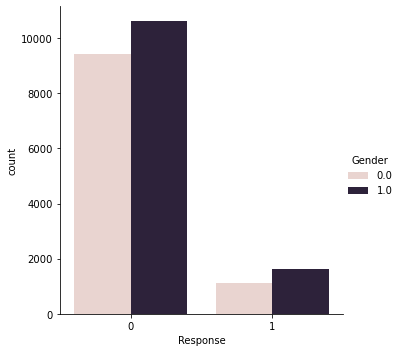

In [21]:
sns.catplot(data = df, x = "Response", kind = "count", hue = "Gender", palette = "ch:")

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X = df[['Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage']]
y = df['Response']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
logmodel = LogisticRegression()

In [27]:
logmodel.fit(X_train, y_train)

LogisticRegression()

In [28]:
acc = logmodel.score(X_test, y_test)*100

In [29]:
acc

88.36528221512248

In [30]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_test, y_test)

SVC()

In [31]:
acc1 = svm.score(X_test, y_test)*100

In [32]:
acc1

88.37859424920129

In [33]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)  # n_neighbors means k
knn.fit(X_train, y_train)
# prediction = knn.predict(x_test)

y_pred = knn.predict(X_test)

acc3 = knn.score(X_test, y_test)*100
print("2 neighbors KNN Score: ",acc3,"%")

2 neighbors KNN Score:  87.11395101171459 %


In [34]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

acc4 = dtc.score(X_test, y_test)*100
print("Decision Tree Test Accuracy", round(acc4, 2),"%")


Decision Tree Test Accuracy 82.83 %
